In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

In [2]:
![CRISP_DM](CRISP_DM.png)

'[CRISP_DM]' is not recognized as an internal or external command,
operable program or batch file.


# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics


# John Hopkins GITHUB csv data

git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [3]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/14/22', '7/15/22', '7/16/22', '7/17/22', '7/18/22', '7/19/22',
       '7/20/22', '7/21/22', '7/22/22', '7/23/22'],
      dtype='object', length=914)

In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [10]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

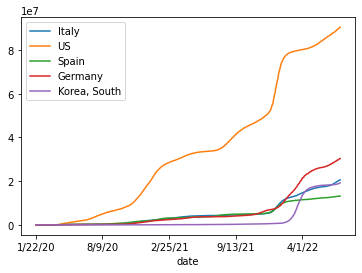

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data type Date

df_plot.head()

In [13]:
df_plot.date[0]

'1/22/20'

In [14]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [15]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [17]:
df_plot.to_csv(r"F:\EDS\eds_covid-19\data\processed\COVID_small_flat_table.csv",sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [18]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [19]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [20]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,no,Albania,0,0,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,no,Algeria,0,0,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,no,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [21]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [22]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [23]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [24]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv(r"F:\EDS_new\EDS-Covid-19-Project-\EDS\eds_covid-19\data\processed\processed\COVID_relational_confirmed.csv",sep=';',index=False)

In [25]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
259335 2022-07-19    no      US   89830497
259620 2022-07-20    no      US   90046261
259905 2022-07-21    no      US   90200438
260190 2022-07-22    no      US   90367064
260475 2022-07-23    no      US   90390185


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [26]:
data_path=r"F:\EDS\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_US.csv"
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,17015,17037,17037,17037,17127,17186,17203,17232,17268,17268
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,60376,60478,60478,60478,60775,60903,61003,61127,61268,61268
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6076,6092,6092,6092,6138,6153,6168,6192,6205,6205
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6818,6825,6825,6825,6841,6850,6857,6872,6882,6882
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,15671,15699,15699,15699,15747,15762,15791,15816,15846,15846


In [27]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [28]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


# update the large relational file

In [29]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [30]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [31]:
pd_relational_model_all.to_csv(r"F:\EDS_new\EDS-Covid-19-Project-\EDS\eds_covid-19\data\processed\processed\20200424_COVID_relational_confirmed.csv",sep=';',index=False)

In [32]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

              date    state country  confirmed
259576  2020-01-22  Alabama      US          0
259577  2020-01-22  Alabama      US          0
259578  2020-01-22  Alabama      US          0
259579  2020-01-22  Alabama      US          0
259580  2020-01-22  Alabama      US          0
...            ...      ...     ...        ...
3314159 2022-07-23  Wyoming      US      11148
3314160 2022-07-23  Wyoming      US       5926
3314161 2022-07-23  Wyoming      US          0
3314162 2022-07-23  Wyoming      US       2545
3314163 2022-07-23  Wyoming      US       1726

[3054588 rows x 4 columns]


# cross check on full sum US data

In [33]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [34]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
...,...,...
2022-07-19,US,89830497
2022-07-20,US,90046261
2022-07-21,US,90200438
